## PyNN Simulation Intro Lab
This Colab Notebook contains unofficial solutions to problems 1.1-4.1 in this PyNN
[Intro Lab](http://spinnakermanchester.github.io/spynnaker/5.0.0/RunningPyNNSimulationsonSpiNNaker-LabManual.pdf). I did not complete problems 4.2 or 5 as of yet, but I may finish them in the future. I offer no guarantees of the correctness of these solutions, but I hope that this document helps you get set up with PyNN and to start trying it out with minimal issues. Other tutorials that may be useful can be found [here](http://spinnakermanchester.github.io/workshops/eighth.html) and [here](http://spinnakermanchester.github.io/spynnaker/5.0.0/). The pyNN documentation is [here](http://neuralensemble.org/docs/PyNN/), and a version of the HBP Neuromorphic Computing Platform document can be found [here](https://electronicvisions.github.io/hbp-sp9-guidebook/).

Matthew So (Apeirogons), Jan 20, 2021

In [1]:
!pip install neuron
!pip install brian2
!pip install pyNN 

     |████████████████████████████████| 8.7MB 7.1MB/s 
     |████████████████████████████████| 1.2MB 7.0MB/s 
     |████████████████████████████████| 5.9MB 24.7MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp36-cp36m-linux_x86_64.whl size=1257533 sha256=49e23d14e8513b66b4a9b789cacaa6602e7c3db65959c13c91f1430c15490e5e
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1
     |████████████████████████████████| 3.2MB 9.1MB/s 
     |████████████████████████████████| 2.1MB 38.5MB/s 
     |████████████████████████████████| 92kB 9.1MB/s 
  Created wheel for pyNN: filename=PyNN-0.9.6-cp36-none-any.whl size=703557 sha256=d25bc012695945df0f1c67f840cb21523fff52e170c0f77d442908a2aff2ab18
  Stored in directory: /root/.cache/pip/wheels/68/e8/ae/f1ea4d62bf1495abfce401a9a5870ba244359102ce9b406237
  

In [2]:
# While the brian2 simulator can be used as a backend for pyNN, it is slower then NEURON. 
# However, pyNN.neuron lacks the RandomDistribution() for some reason, so we import the brian2 backend for it.
import pyNN.brian2 as brian

# NEURON is the main simulation backend.
import pyNN.neuron as sim
import matplotlib.pyplot as plt
import numpy as np
import pyNN.utility.plotting as plot

WARNING    /usr/local/lib/python3.6/dist-packages/pyNN/neuron/__init__.py:14: UserWarning: mpi4py not available
  warnings.warn("mpi4py not available")
 [py.warnings]


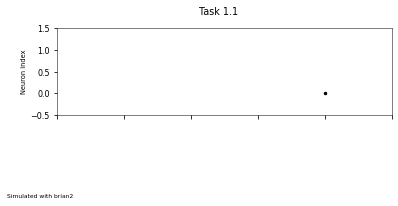

In [3]:
# Task 1.1: A simple neural network [Easy]

sim.setup(timestep=1.0)

inp_source_0 = sim.Population(1, sim.SpikeSourceArray(spike_times=[0]), label='inp_0')
inp_source_1 = sim.Population(1, sim.SpikeSourceArray(spike_times=[1000]), label='inp_1')
LIF_neurons = sim.Population(2, sim.IF_curr_exp(), label='LIF')
connection_0 = sim.Projection(inp_source_0, LIF_neurons, sim.OneToOneConnector(), synapse_type=sim.StaticSynapse(weight=5, delay=2))

LIF_neurons.record(['spikes'])
simtime = 10
sim.run(simtime)
neo = LIF_neurons.get_data(variables=['spikes'])
spikes = neo.segments[0].spiketrains
sim.end()

plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 1.1",
    annotations="Simulated with {}".format('brian2')
    )
plt.show()



WARNING    /usr/local/lib/python3.6/dist-packages/pyNN/neuron/recording.py:115: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  signals = numpy.vstack((id._cell.traces[variable] for id in ids)).T
 [py.warnings]


[[-65.         -65.        ]
 [-65.         -65.        ]
 [-65.         -65.        ]
 [-60.23809524 -65.        ]
 [-58.71304574 -65.        ]
 [-58.36797079 -65.        ]
 [-58.44670043 -65.        ]
 [-58.67154498 -65.        ]
 [-58.94081452 -65.        ]
 [-59.21754358 -65.        ]
 [-59.48855635 -65.        ]] mV


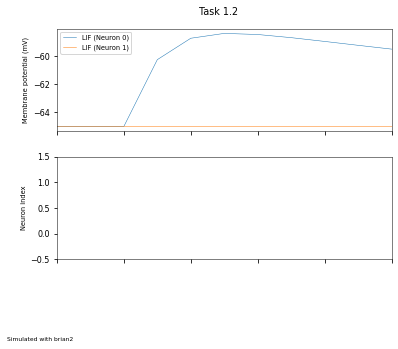

In [4]:
# Task 1.2: Changing parameters [Easy]

sim.setup(timestep=1.0)

inp_source_0 = sim.Population(1, sim.SpikeSourceArray(spike_times=[0]), label='inp_0')
inp_source_1 = sim.Population(1, sim.SpikeSourceArray(spike_times=[1000]), label='inp_1')
LIF_neurons = sim.Population(2, sim.IF_curr_exp(tau_syn_E=1.0), label='LIF')
connection_0 = sim.Projection(inp_source_0, LIF_neurons, sim.OneToOneConnector(), synapse_type=sim.StaticSynapse(weight=5, delay=2))

LIF_neurons.record(['spikes', 'v'])
simtime = 10
sim.run(simtime)
neo = LIF_neurons.get_data(variables=['spikes', 'v'])
spikes = neo.segments[0].spiketrains
v = neo.segments[0].filter(name='v')[0]
print(v)
sim.end()


plot.Figure(
# plot voltage for first ([0]) neuron
plot.Panel(v, ylabel="Membrane potential (mV)",
data_labels=[LIF_neurons.label], yticks=True, xlim=(0, simtime)),
# plot spikes (or in this case spike)
plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
title="Task 1.2",
annotations="Simulated with {}".format('brian2')
)
plt.show()



WARNING    /usr/local/lib/python3.6/dist-packages/pyNN/neuron/recording.py:115: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  signals = numpy.vstack((id._cell.traces[variable] for id in ids)).T
 [py.warnings]


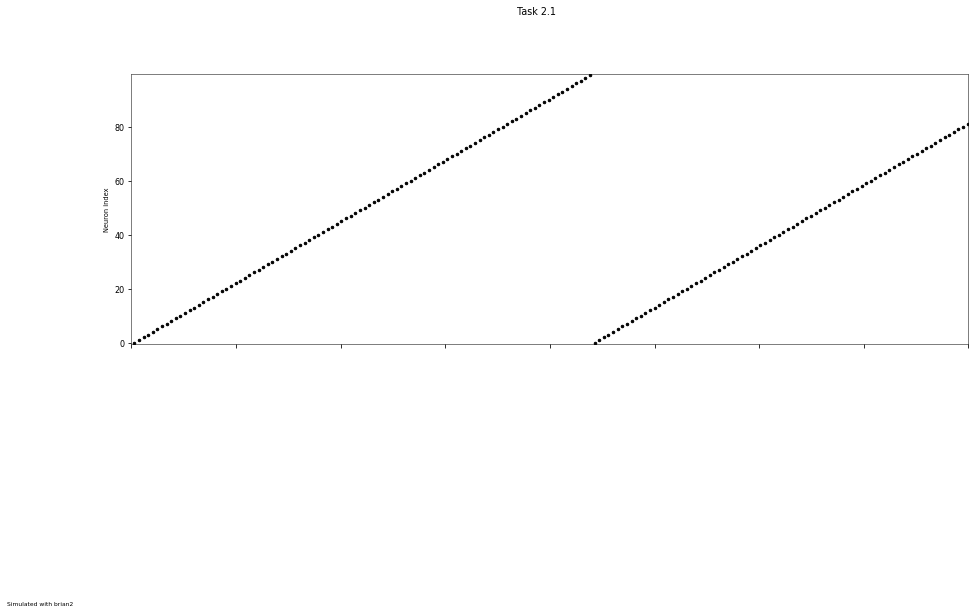

In [5]:
# Task 2.1: Synfire Chain [Moderate]

sim.setup(timestep=1.0)

inp_source_0 = sim.Population(1, sim.SpikeSourceArray(spike_times=[0.0]))
LIF_neurons = sim.Population(100, sim.IF_curr_exp(), label='LIF')

inp_first_connector = sim.FromListConnector([(0, 0)])
connection_0 = sim.Projection(inp_source_0, LIF_neurons, inp_first_connector,synapse_type=sim.StaticSynapse(weight=5, delay=1)) 

between_connector = sim.FromListConnector([(i, i+1) for i in range(len(LIF_neurons)-1)])
connection_between = sim.Projection(LIF_neurons, LIF_neurons, between_connector, synapse_type=sim.StaticSynapse(weight=5, delay=5))

recurrent_connector = sim.FromListConnector([(99, 0)])

connection_recurrent = sim.Projection(LIF_neurons, LIF_neurons, recurrent_connector, synapse_type=sim.StaticSynapse(weight=5, delay=5))

LIF_neurons.record(['spikes', 'v'])
simtime = 2000
sim.run(simtime)
neo = LIF_neurons.get_data(variables=['spikes', 'v'])
spikes = neo.segments[0].spiketrains
v = neo.segments[0].filter(name='v')[0]
sim.end()

plt.figure(figsize=(15, 10))
plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 2.1",
    annotations="Simulated with {}".format('brian2')
    )
plt.show()



WARNING    /usr/local/lib/python3.6/dist-packages/pyNN/neuron/recording.py:115: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  signals = numpy.vstack((id._cell.traces[variable] for id in ids)).T
 [py.warnings]


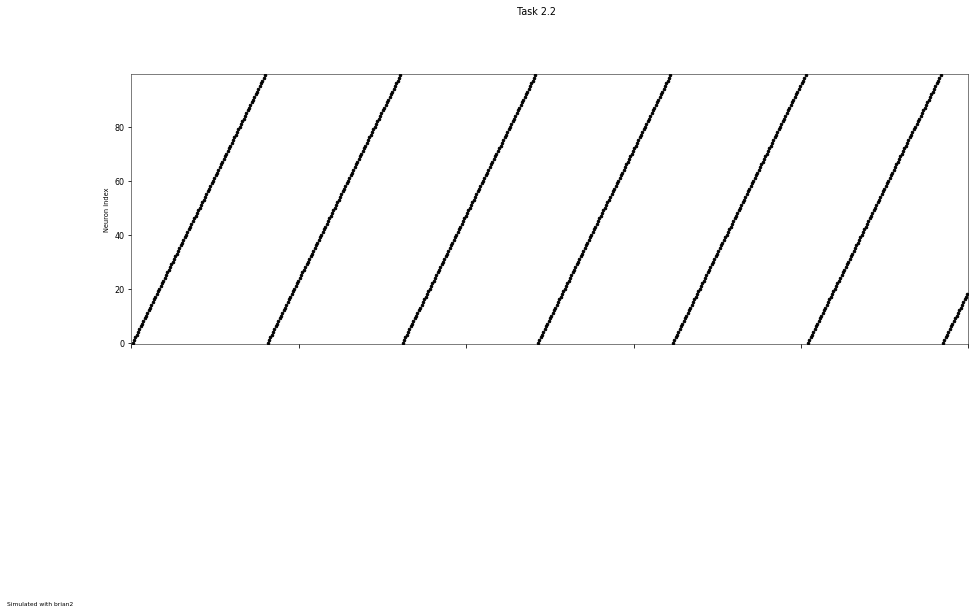

In [6]:
# Task 2.2: Random Values

sim.setup(timestep=1.0)
simtime = 5000

inp_source_0 = sim.Population(1, sim.SpikeSourceArray(spike_times=[0.0]))
LIF_neurons = sim.Population(100, sim.IF_curr_exp(), label='LIF')

inp_first_connector = sim.FromListConnector([(0, 0)])
connection_0 = sim.Projection(inp_source_0, LIF_neurons, inp_first_connector,synapse_type=sim.StaticSynapse(weight=5, delay=1)) 

between_connector = sim.FromListConnector([(i, i+1) for i in range(len(LIF_neurons)-1)])
connection_between = sim.Projection(LIF_neurons, LIF_neurons, between_connector, synapse_type=sim.StaticSynapse(weight=5, delay=brian.RandomDistribution('uniform', low=1.0, high=15.0)))

recurrent_connector = sim.FromListConnector([(99, 0)])

connection_recurrent = sim.Projection(LIF_neurons, LIF_neurons, recurrent_connector, synapse_type=sim.StaticSynapse(weight=5, delay=brian.RandomDistribution('uniform', low=1.0, high=15.0)))

LIF_neurons.record(['spikes', 'v'])

sim.run(simtime)
neo = LIF_neurons.get_data(variables=['spikes', 'v'])
spikes = neo.segments[0].spiketrains
v = neo.segments[0].filter(name='v')[0]
sim.end()

plt.figure(figsize=(15, 10))
plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 2.2",
    annotations="Simulated with {}".format('brian2')
    )
plt.show()



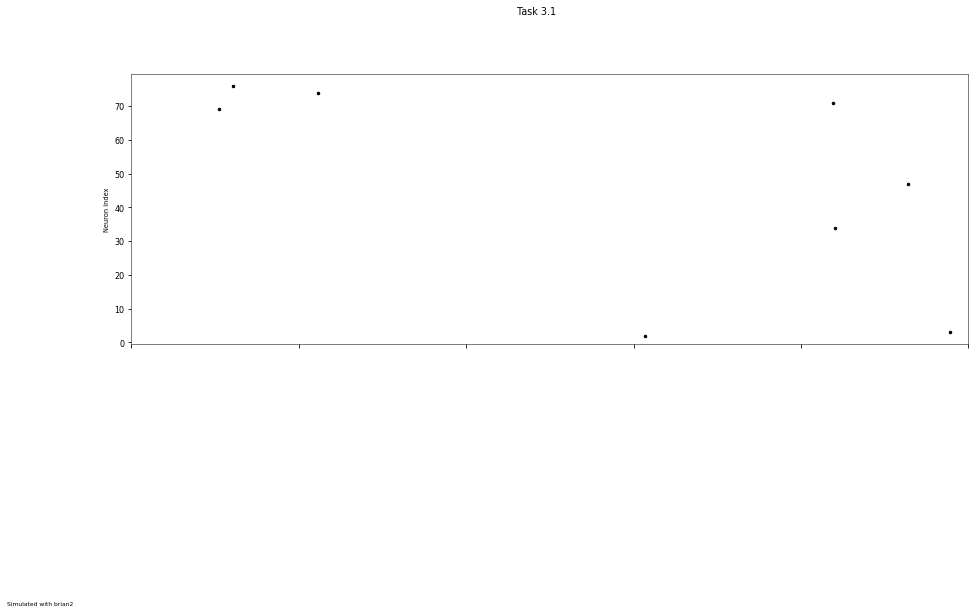

In [7]:
# Task 3.1: Balanced Random Cortex-like Network

ts = 0.1
sim.setup(timestep=ts)

exc = sim.Population(80, sim.IF_curr_exp(), label='exc')
inh = sim.Population(20, sim.IF_curr_exp(), label='inh')


exc_stim = sim.Population(80, sim.SpikeSourcePoisson(rate=1000))
inh_stim = sim.Population(20, sim.SpikeSourcePoisson(rate=1000))

excstim_exc = sim.Projection(exc_stim, exc, sim.OneToOneConnector(), synapse_type=sim.StaticSynapse(weight=0.1, delay=1))
inhstim_inh = sim.Projection(inh_stim, inh, sim.OneToOneConnector(), synapse_type=sim.StaticSynapse(weight=0.1, delay=1))

exc_inh = sim.Projection(exc, inh, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=brian.RandomDistribution('normal_clipped', mu=0.1, sigma=0.1, low=0, high=np.inf), delay = brian.RandomDistribution('normal_clipped', mu=1.5, sigma=0.75, low=ts*1, high=ts*144)))

exc_exc = sim.Projection(exc, exc, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=brian.RandomDistribution('normal_clipped', mu=0.1, sigma=0.1, low=0, high=np.inf), delay = brian.RandomDistribution('normal_clipped', mu=1.5, sigma=0.75, low=ts*1, high=ts*144)))

inh_exc = sim.Projection(inh, exc, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=brian.RandomDistribution('normal_clipped', mu=-0.4, sigma=0.1, low=-np.inf, high=0), delay = brian.RandomDistribution('normal_clipped', mu=0.75, sigma=0.375, low=ts*1, high=ts*144)))

inh_inh = sim.Projection(inh, exc, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=brian.RandomDistribution('normal_clipped', mu=-0.4, sigma=0.1, low=-np.inf, high=0), delay = brian.RandomDistribution('normal_clipped', mu=0.75, sigma=0.375, low=ts*1, high=ts*144)))

exc.initialize(v=brian.RandomDistribution('uniform', low=-65, high=-55))
inh.initialize(v=brian.RandomDistribution('uniform', low=-65, high=-55))

exc.record(['spikes'])
simtime=1000
sim.run(simtime)
neo = exc.get_data(variables=['spikes'])
spikes = neo.segments[0].spiketrains

sim.end()

plt.figure(figsize=(15, 10))
plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 3.1",
    annotations="Simulated with {}".format('brian2')
    )
plt.show()


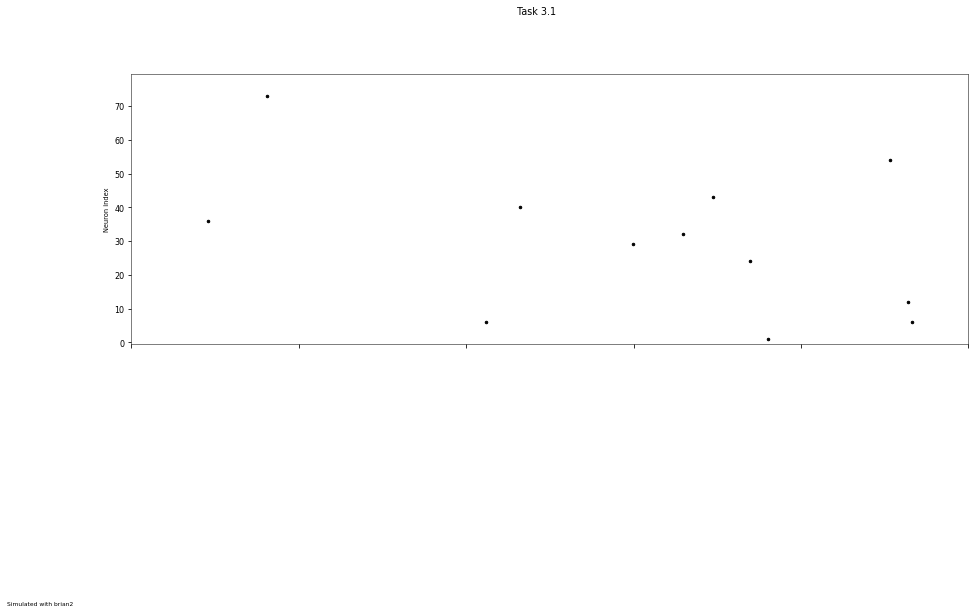

In [8]:
# Task 3.1: Balanced Random Cortex-like Network

ts = 0.1
sim.setup(timestep=ts)

exc = sim.Population(80, sim.IF_curr_exp(), label='exc')
inh = sim.Population(20, sim.IF_curr_exp(), label='inh')


exc_stim = sim.Population(80, sim.SpikeSourcePoisson(rate=1000))
inh_stim = sim.Population(20, sim.SpikeSourcePoisson(rate=1000))

excstim_exc = sim.Projection(exc_stim, exc, sim.OneToOneConnector(), synapse_type=sim.StaticSynapse(weight=0.1, delay=1))
inhstim_inh = sim.Projection(inh_stim, inh, sim.OneToOneConnector(), synapse_type=sim.StaticSynapse(weight=0.1, delay=1))

exc_inh = sim.Projection(exc, inh, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=brian.RandomDistribution('normal_clipped', mu=0.11, sigma=0.1, low=0, high=np.inf), delay = brian.RandomDistribution('normal_clipped', mu=1.5, sigma=0.75, low=ts*1, high=ts*144)))

exc_exc = sim.Projection(exc, exc, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=brian.RandomDistribution('normal_clipped', mu=0.11, sigma=0.1, low=0, high=np.inf), delay = brian.RandomDistribution('normal_clipped', mu=1.5, sigma=0.75, low=ts*1, high=ts*144)))

inh_exc = sim.Projection(inh, exc, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=brian.RandomDistribution('normal_clipped', mu=-0.44, sigma=0.1, low=-np.inf, high=0), delay = brian.RandomDistribution('normal_clipped', mu=0.75, sigma=0.375, low=ts*1, high=ts*144)))

inh_inh = sim.Projection(inh, exc, sim.FixedProbabilityConnector(0.1), synapse_type = sim.StaticSynapse(weight=brian.RandomDistribution('normal_clipped', mu=-0.44, sigma=0.1, low=-np.inf, high=0), delay = brian.RandomDistribution('normal_clipped', mu=0.75, sigma=0.375, low=ts*1, high=ts*144)))

exc.initialize(v=brian.RandomDistribution('uniform', low=-65, high=-55))
inh.initialize(v=brian.RandomDistribution('uniform', low=-65, high=-55))

exc.record(['spikes'])
simtime=1000
sim.run(simtime)
neo = exc.get_data(variables=['spikes'])
spikes = neo.segments[0].spiketrains

sim.end()

plt.figure(figsize=(15, 10))
plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 3.1",
    annotations="Simulated with {}".format('brian2')
    )
plt.show()


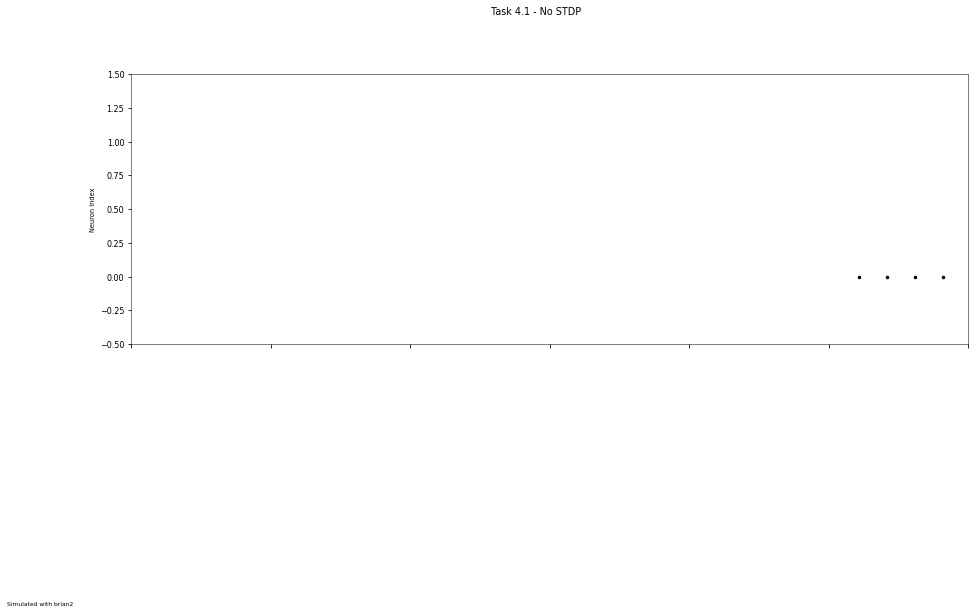

No STDP: Connection weights
[[nan 0.1]
 [nan nan]]


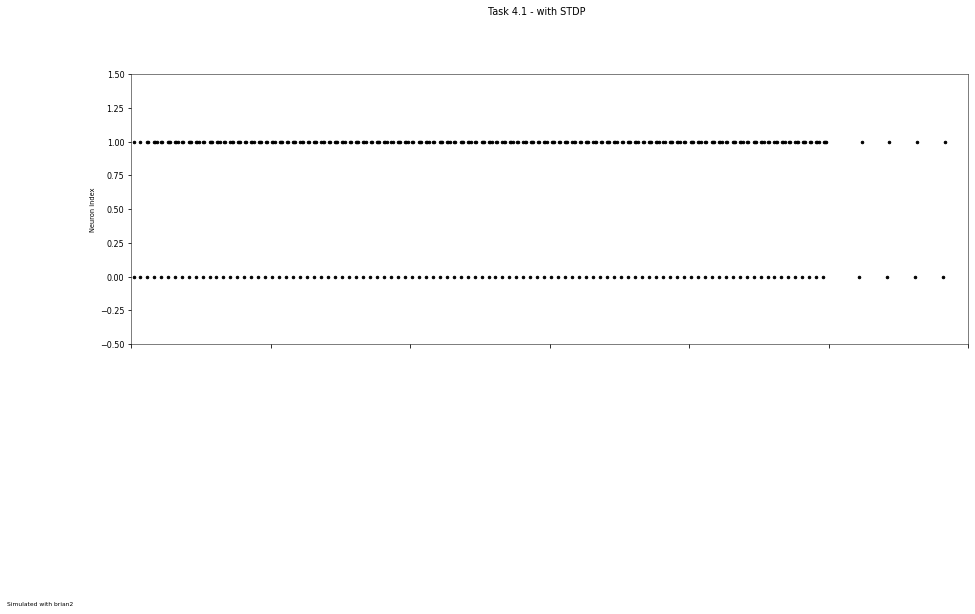

With STDP: Connection weights
[[nan  5.]
 [nan nan]]


In [9]:
sim.setup(timestep=1)
pop_0 = sim.Population(2, sim.IF_curr_exp())
timing_rule = sim.SpikePairRule(tau_plus=20.0, tau_minus=20.0,
A_plus=0.5, A_minus=0.5)
weight_rule = sim.AdditiveWeightDependence(w_max=5.0, w_min=0.0)

stdp = sim.STDPMechanism(timing_dependence = timing_rule, weight_dependence = weight_rule, weight=0.1, delay=3)

between_connection = sim.Projection(pop_0, pop_0, sim.FromListConnector([(0, 1)]), synapse_type=stdp)

stim_0 = sim.Population(1, sim.SpikeSourceArray(spike_times = [] + [2600, 2700, 2800, 2900]))
stim_1 = sim.Population(1, sim.SpikeSourceArray(spike_times = []))
stim_conn_0 = sim.Projection(stim_0, pop_0, sim.FromListConnector([(0, 0)]), synapse_type=sim.StaticSynapse(weight=5, delay=2))
stim_conn_1 = sim.Projection(stim_1, pop_0, sim.FromListConnector([(0, 1)]), synapse_type=sim.StaticSynapse(weight=5, delay=2))
pop_0.record(['spikes'])

simtime=3000
sim.run(simtime)
neo = pop_0.get_data(variables=['spikes'])
spikes = neo.segments[0].spiketrains

plt.figure(figsize=(15, 10))
plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 4.1 - No STDP",
    annotations="Simulated with {}".format('brian2'))
plt.show()

print('No STDP: Connection weights')
print(between_connection.get('weight', format='array'))
sim.end()



sim.setup(timestep=1)
pop_0 = sim.Population(2, sim.IF_curr_exp())
timing_rule = sim.SpikePairRule(tau_plus=20.0, tau_minus=20.0,
A_plus=0.5, A_minus=0.5)
weight_rule = sim.AdditiveWeightDependence(w_max=5.0, w_min=0.0)

stdp = sim.STDPMechanism(timing_dependence = timing_rule, weight_dependence = weight_rule, weight=0.1, delay=3)

between_connection = sim.Projection(pop_0, pop_0, sim.FromListConnector([(0, 1)]), synapse_type=stdp)

stim_0 = sim.Population(1, sim.SpikeSourceArray(spike_times = [25*x for x in range(100)] + [2600, 2700, 2800, 2900]))
stim_1 = sim.Population(1, sim.SpikeSourceArray(spike_times = [25*x+2 for x in range(100)]))
stim_conn_0 = sim.Projection(stim_0, pop_0, sim.FromListConnector([(0, 0)]), synapse_type=sim.StaticSynapse(weight=5, delay=2))
stim_conn_1 = sim.Projection(stim_1, pop_0, sim.FromListConnector([(0, 1)]), synapse_type=sim.StaticSynapse(weight=5, delay=2))
pop_0.record(['spikes'])

simtime=3000
sim.run(simtime)
neo = pop_0.get_data(variables=['spikes'])
spikes = neo.segments[0].spiketrains

plt.figure(figsize=(15, 10))
plot.Figure(
    plot.Panel(spikes, yticks=True, markersize=5, xlim=(0, simtime)),
    title="Task 4.1 - with STDP",
    annotations="Simulated with {}".format('brian2'))
plt.show()
#plt.figure(figsize=(15, 10))
#plot.Figure(
#    plot.Panel(spikes_1, yticks=True, markersize=5, xlim=(0, simtime)),
#    title="Task 3.2",
#    annotations="Simulated with {}".format('brian2'))
#plt.show()
print('With STDP: Connection weights')
print(between_connection.get('weight', format='array'))
sim.end()


